In [187]:
using LinearAlgebra
using Plots

In [237]:
# Número de amostras
m = 100

# R^n - polinômio de n variáveis
n = 5

# Matriz linha, onde cada linha é uma amostra x
# de R^n, isto é
# m vetores de R^n
x = randn(m, n)

# m amostras (escalar)
y = randn(m)

100-element Array{Float64,1}:
 -0.15847391839099276
 -0.04244176042932325
 -0.5095507989159146
  0.5245402619312673
 -1.148430098858663
  1.3754203271835415
  0.770598605638914
  1.134128800834293
 -0.035752065312409896
 -0.8788887696510417
  0.21738039747443236
 -1.345008280900488
  1.094777905013178
  ⋮
 -0.5479734365805161
 -0.7920072125294252
 -0.5156184022637041
 -0.8642710914734416
 -0.20812152446919613
  1.637419420992598
  0.6809300025291533
 -1.4538092263678093
 -0.8906029198532469
  0.24407873442948874
  0.02124854343182247
 -1.3163864069684412

In [238]:
function generar_indices(n, d)
    # n: número de variáveis do polinômio
    # d: grau do polinômio
    
    if n == 1
        return [[d]]
    end
    
    indices = []
    for k in 0:d
        for rest in generar_indices(n-1, d - k)
            push!(indices, [k; rest])
        end
    end
    return indices
end

function multi_indices(n, d)
    # n: Número de variáveis do polinômio
    # d: Grau do polinômio
    
    indices = []
    for total in 0:d
        append!(indices, generar_indices(n, total))
    end
    return indices
end


multi_indices (generic function with 1 method)

In [239]:
function matrixA(x, y, d)
    # x: matrix das amostras
    # y: vetor das amostras escalares
    # d: grau do polinômio
    
    # número de amostras
    Namost = length(y) 
    
    # número de variáveis do vetor
    Nvar = size(x, 2)  
    
    # indidces possíveis
    indices = multi_indices(Nvar, d)
    
    # número de monômios possíveis
    Nmon = length(indices)  
    
    A = zeros(Namost, Nmon)

    # Acessa a linha i (i-ésima amostra)    # n: Número de variáveis do polinômio
    # d: Grau do polinômio
    for i in 1:Namost
        # Acessa a coluna j
        for j in 1:Nmon
            
            # Acessa item a item
            # Faz o produtório, dos elementos (Nvar) da amostra i,
            # variando o expoente de cada elemento. Isto é, acessa
            # a j-ésima combinação de indices e o k-ésimo indice (1 =< k =< Nvar)
            # sendo este o k-ésimo expoente da k-ésima variável do vetor linha (vetor amostra).
            A[i, j] = prod(x[i, k]^indices[j][k] for k in 1:Nvar)
        end
    end

    return A
end

matrixA (generic function with 1 method)

In [240]:
function min_quadrados(x, y, d)
    A = matrixA(x, y, d)
    
    # [f0(a) ; f1(a) ; ...; fd(a)]
    f = copy(A\y)
    
    # Vetor solução / norma do resíduo
    return (f, norm(A*f-y))
    
end

min_quadrados (generic function with 1 method)

In [241]:
# Número de amostras
m = 100

# R^n - n variáveis
n = 5

# Matriz linha, onde cada linha é uma amostra x
# de R^n, isto é
# m vetores de R^n
x = randn(m, n)

# m amostras (escalar)
y = randn(m)

print("--- TESTES ---")

--- TESTES ---

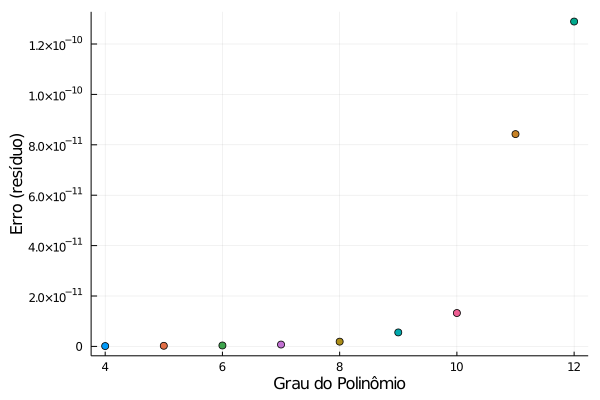

In [242]:
# GRAU ÓTIMO para P(X) - GRÁFICO DE DISPERSÃO

graph = plot(xlabel = "Grau do Polinômio", ylabel = "Erro (resíduo)")

for d in 4:12
    (_, Normresiduo) = min_quadrados(x, y, d)
    
    scatter!([d], [Normresiduo], label = false)
end

display(graph)

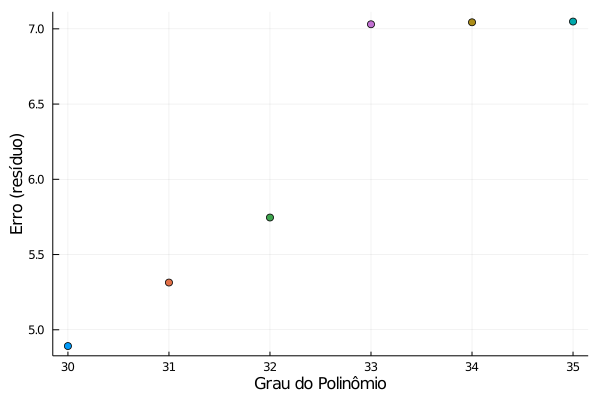

In [243]:
graph = plot(xlabel = "Grau do Polinômio", ylabel = "Erro (resíduo)")

for d in 30:35
    (_, Normresiduo) = min_quadrados(x, y, d)
    
    scatter!([d], [Normresiduo], label = false)
end

display(graph)